In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS 
from nltk.tokenize import word_tokenize #word tokenizer

In [132]:
nltk.download('inaugural')


[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\chith\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


True

In [119]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [5]:
from nltk.corpus import inaugural
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [6]:
doc_list=[]
doc_list.append(inaugural.raw('1941-Roosevelt.txt'))
doc_list.append(inaugural.raw('1961-Kennedy.txt'))
doc_list.append(inaugural.raw('1973-Nixon.txt'))
doc_list.append(inaugural.raw('2017-Trump.txt'))
documents=pd.Series(data=doc_list,index=['1941-Roosevelt','1961-Kennedy','1973-Nixon','2017-Trump.txt'])
doc_df=pd.DataFrame(documents,columns=['Speech'])

In [7]:
doc_df.head()

,Speech
1941-Roosevelt,On each national day of inauguration since 178...
1961-Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
1973-Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."
2017-Trump.txt,"Chief Justice Roberts, President Carter, Presi..."


#### Find the number of characters, words and sentences for the mentioned documents. 

In [9]:
#Number of characters with space
[len(x) for x in doc_df.Speech]

[7571, 7618, 9991]

In [120]:
doc_df.Speech.apply(lambda x: len(x))

1941-Roosevelt    7571
1961-Kennedy      7618
1973-Nixon        9991
Name: Speech, dtype: int64

In [10]:
#No. od characters without Space
no_char=0
doc_df.Speech.apply(lambda x: sum([len(x) for x in x.split()]))

1941-Roosevelt    6174
1961-Kennedy      6202
1973-Nixon        8122
Name: Speech, dtype: int64

In [11]:
#No. of words
[len(x.split()) for x in doc_df['Speech']]


[1360, 1390, 1819]

In [123]:
doc_df.Speech.apply(lambda x: len([x for x in x.split()]))

1941-Roosevelt    1360
1961-Kennedy      1390
1973-Nixon        1819
Name: Speech, dtype: int64

In [12]:
def no_sentence(doc):
    n=0
    n=len(re.findall('[^:,][\n]+',doc)) #exclude , or : since that becomes a phrase
    n+=len(re.findall('\?[^\n]',doc)) # Questions(end with ? withput \n)
    return n

In [13]:
for ind,doc in doc_df.iterrows():
    no_sentences=no_sentence(doc.Speech)
    print("No. of sentences in {}'s inaugral Speech is".format(ind),no_sentences)

No. of sentences in 1941-Roosevelt's inaugral Speech is 38
No. of sentences in 1961-Kennedy's inaugral Speech is 28
No. of sentences in 1973-Nixon's inaugral Speech is 52


In [16]:
doc_df.to_clipboard()
#splitlines

## Remove all the stopwords from the three speeches.	

In [11]:
doc_df['Speech']=doc_df['Speech'].str.lower()

In [12]:
stopword=stopwords.words('english')

In [46]:
stopword

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [13]:
doc_df['processed_speech']=doc_df['Speech'].apply(lambda x: " ".join(x for x in x.split() if x not in stopword))

In [14]:
features=doc_df['processed_speech']
processed_features = []

for sentence in range(0, len(features)):
    
    processed_feature = re.sub(r"'s", 's', features[sentence])
    
    #Remove punctualtions and hyphens
    processed_feature = re.sub(r"\W", ' ', processed_feature)
   
    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I) #flags - I - Ignorecase
    #Flags allow you to control the regular expression engine. Because regular expressions are so powerful, they are a useful way of switching on and off certain features (e.g. whether to ignore capitalization when matching your regex).

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [15]:
doc_df['processed_speech']=processed_features

## 2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords

In [16]:
[x for x in doc_df['processed_speech'].str.split()]

[['national',
  'day',
  'inauguration',
  'since',
  '1789',
  'people',
  'renewed',
  'sense',
  'dedication',
  'united',
  'states',
  'washingtons',
  'day',
  'task',
  'people',
  'create',
  'weld',
  'together',
  'nation',
  'lincolns',
  'day',
  'task',
  'people',
  'preserve',
  'nation',
  'disruption',
  'within',
  'day',
  'task',
  'people',
  'save',
  'nation',
  'institutions',
  'disruption',
  'without',
  'us',
  'come',
  'time',
  'midst',
  'swift',
  'happenings',
  'pause',
  'moment',
  'take',
  'stock',
  'recall',
  'place',
  'history',
  'been',
  'rediscover',
  'may',
  'be',
  'not',
  'risk',
  'real',
  'peril',
  'inaction',
  'lives',
  'nations',
  'determined',
  'count',
  'years',
  'lifetime',
  'human',
  'spirit',
  'life',
  'man',
  'three',
  'score',
  'years',
  'ten',
  'little',
  'more',
  'little',
  'less',
  'life',
  'nation',
  'fullness',
  'measure',
  'live',
  'men',
  'doubt',
  'this',
  'men',
  'believe',
  'democr

In [17]:
for index,doc in doc_df.iterrows():
    print("Top words in  {}'s inaugral speech are :\n".format(index),pd.Series(doc.processed_speech.split()).value_counts()[:3],'\n')
    

Top words in  1941-Roosevelt's inaugral speech are :
 nation       11
know         10
democracy     9
dtype: int64 

Top words in  1961-Kennedy's inaugral speech are :
 let      16
us       12
world     8
dtype: int64 

Top words in  1973-Nixon's inaugral speech are :
 us       26
let      22
peace    19
dtype: int64 

Top words in  2017-Trump.txt's inaugral speech are :
 america     19
american    11
people      10
dtype: int64 



## 2.4) Plot the word cloud of each of the three speeches. (after removing the stopwords)	

In [18]:
for i,doc in doc_df.iterrows(): # iterating in processes features through each sentence
    word_tokens = word_tokenize(doc.processed_speech) # converting each sentence to a token
    print(word_tokens)

['national', 'day', 'inauguration', 'since', '1789', 'people', 'renewed', 'sense', 'dedication', 'united', 'states', 'washingtons', 'day', 'task', 'people', 'create', 'weld', 'together', 'nation', 'lincolns', 'day', 'task', 'people', 'preserve', 'nation', 'disruption', 'within', 'day', 'task', 'people', 'save', 'nation', 'institutions', 'disruption', 'without', 'us', 'come', 'time', 'midst', 'swift', 'happenings', 'pause', 'moment', 'take', 'stock', 'recall', 'place', 'history', 'been', 'rediscover', 'may', 'be', 'not', 'risk', 'real', 'peril', 'inaction', 'lives', 'nations', 'determined', 'count', 'years', 'lifetime', 'human', 'spirit', 'life', 'man', 'three', 'score', 'years', 'ten', 'little', 'more', 'little', 'less', 'life', 'nation', 'fullness', 'measure', 'live', 'men', 'doubt', 'this', 'men', 'believe', 'democracy', 'form', 'government', 'frame', 'life', 'limited', 'measured', 'kind', 'mystical', 'artificial', 'fate', 'that', 'unexplained', 'reason', 'tyranny', 'slavery', 'becom

In [19]:
image=pd.DataFrame(columns=['word_cloud','president'])
image.president=doc_df.index
image.set_index('president')
image.head()

,word_cloud,president
0,NaN,1941-Roosevelt
1,NaN,1961-Kennedy
2,NaN,1973-Nixon
3,NaN,2017-Trump.txt


In [22]:
img=[]                      

stop_words = set(stopwords.words('english'))  #intialise stopwords from English Language

filtered_sentence = [] #empty list
for i,doc in doc_df.iterrows(): # iterating in processes features through each sentence
    word_tokens = word_tokenize(doc.processed_speech) # converting each sentence to a token
    for w in word_tokens:#in each token, removing stopwords from english language
        if w not in stop_words:
            filtered_sentence.append(w) #appending non-stopwords to filtered_sentence list

    comment_words = ' ' #empty string
    stop_words = set(STOPWORDS) #stopwords from Wordcloud

    for words in filtered_sentence:
        comment_words = comment_words + words + ' ' #converting to string
          
            
    wordcloud = WordCloud(width = 1000, height = 1000, #wordcloud image creation
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(comment_words) 
    
    img.append(wordcloud)
  
    

In [23]:
# plot the WordCloud image   
def print_wordcloud(i,pres_name):
    plt.figure(figsize = (10, 10), facecolor = None) 
    plt.imshow(i) 
    plt.title('Word Cloud - '+pres_name,fontsize=50)
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

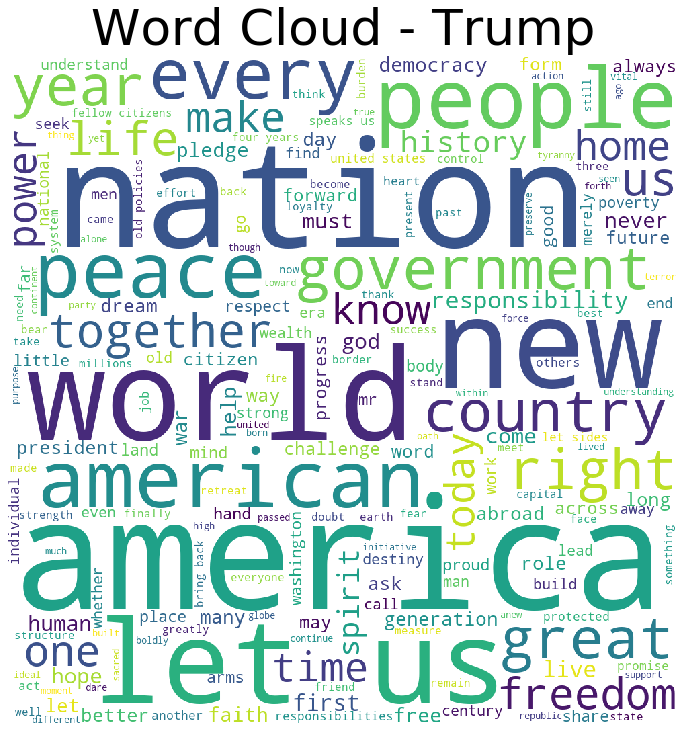

In [27]:
print_wordcloud(img[3],'Trump')